In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA on the Data

In [38]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## cheking null values

In [41]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### checking duplicate values

In [42]:
data.duplicated().sum()

0

# Data Visualization

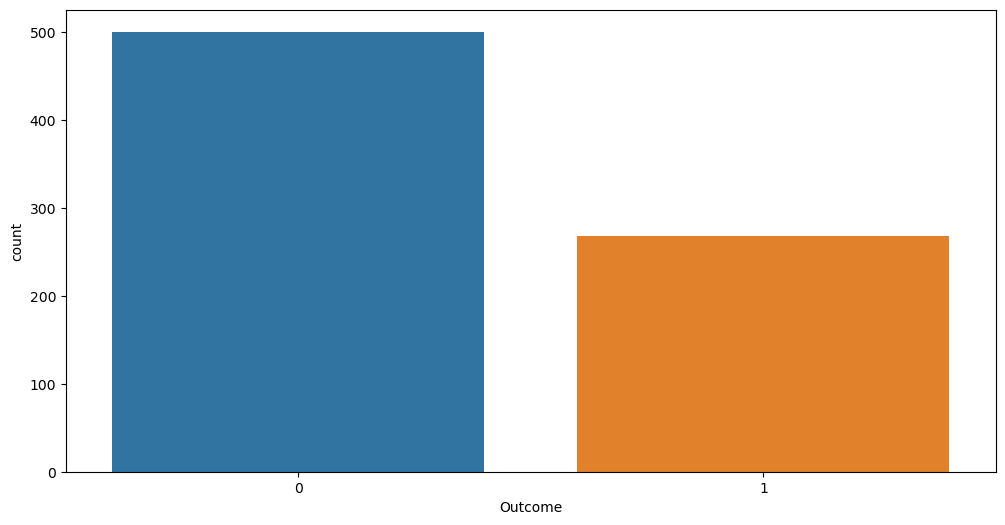

In [43]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Outcome', data = data)
plt.show()

In [44]:
outcome_percentages = data['Outcome'].value_counts(normalize=True) * 100
print(outcome_percentages)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64


In [45]:
outcome_counts = data['Outcome'].value_counts()
print(outcome_counts)

0    500
1    268
Name: Outcome, dtype: int64


### Observing outliers

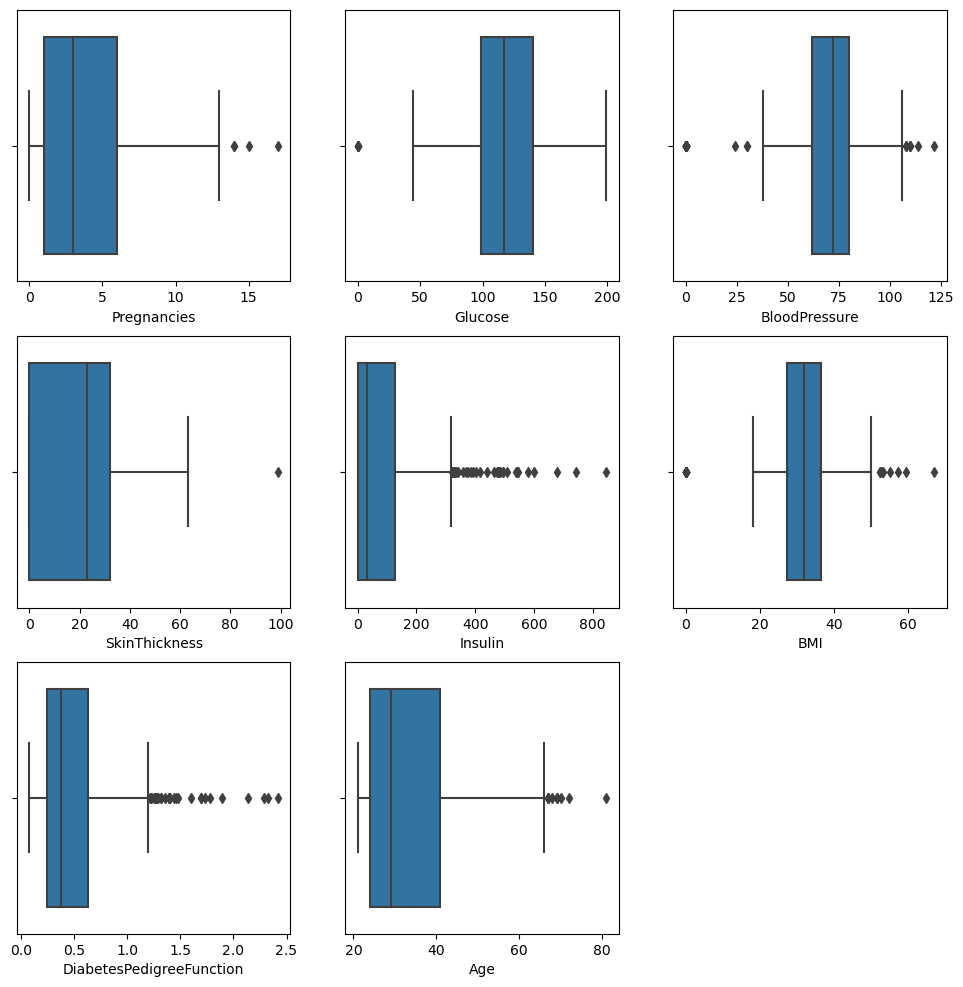

In [46]:
plt.figure(figsize = (12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness' ,'Insulin','BMI','DiabetesPedigreeFunction','Age' ]):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = data)
plt.show()

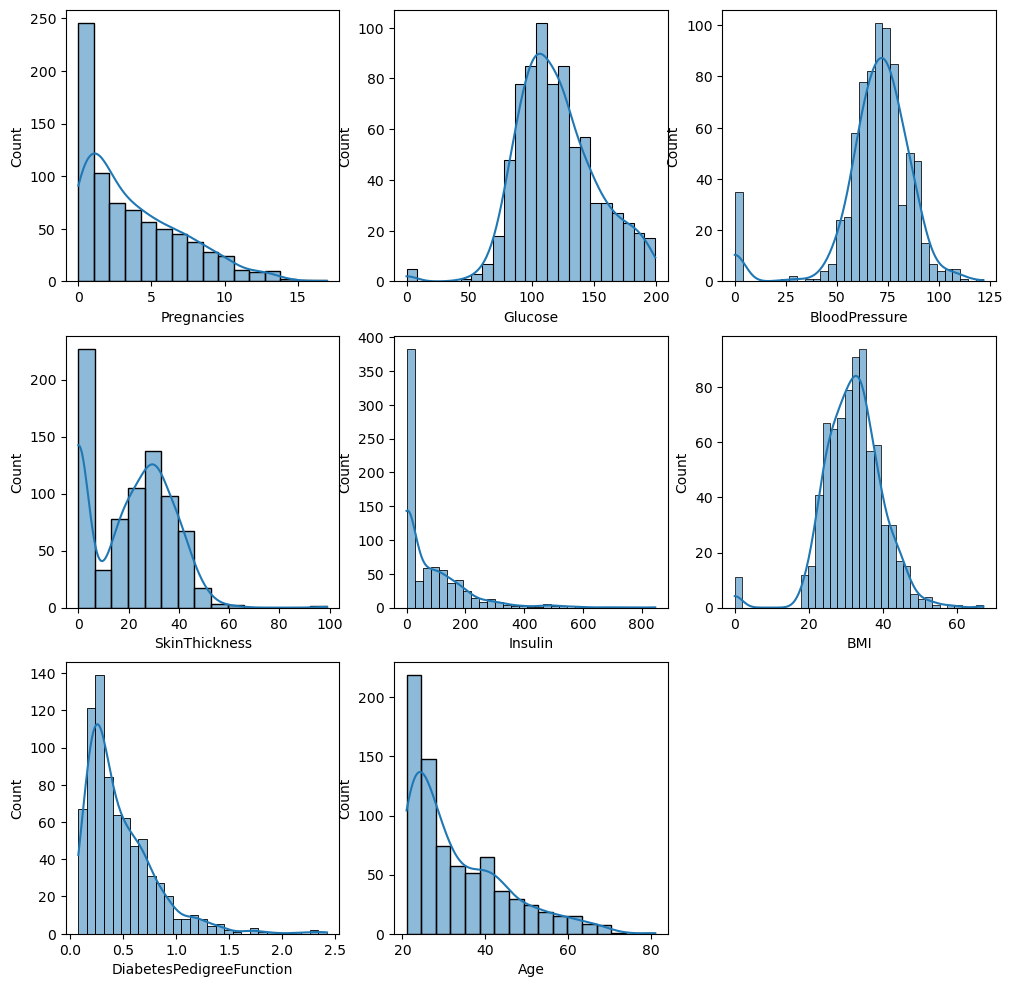

In [47]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=col, data=data, kde = True)
plt.show()

<Axes: >

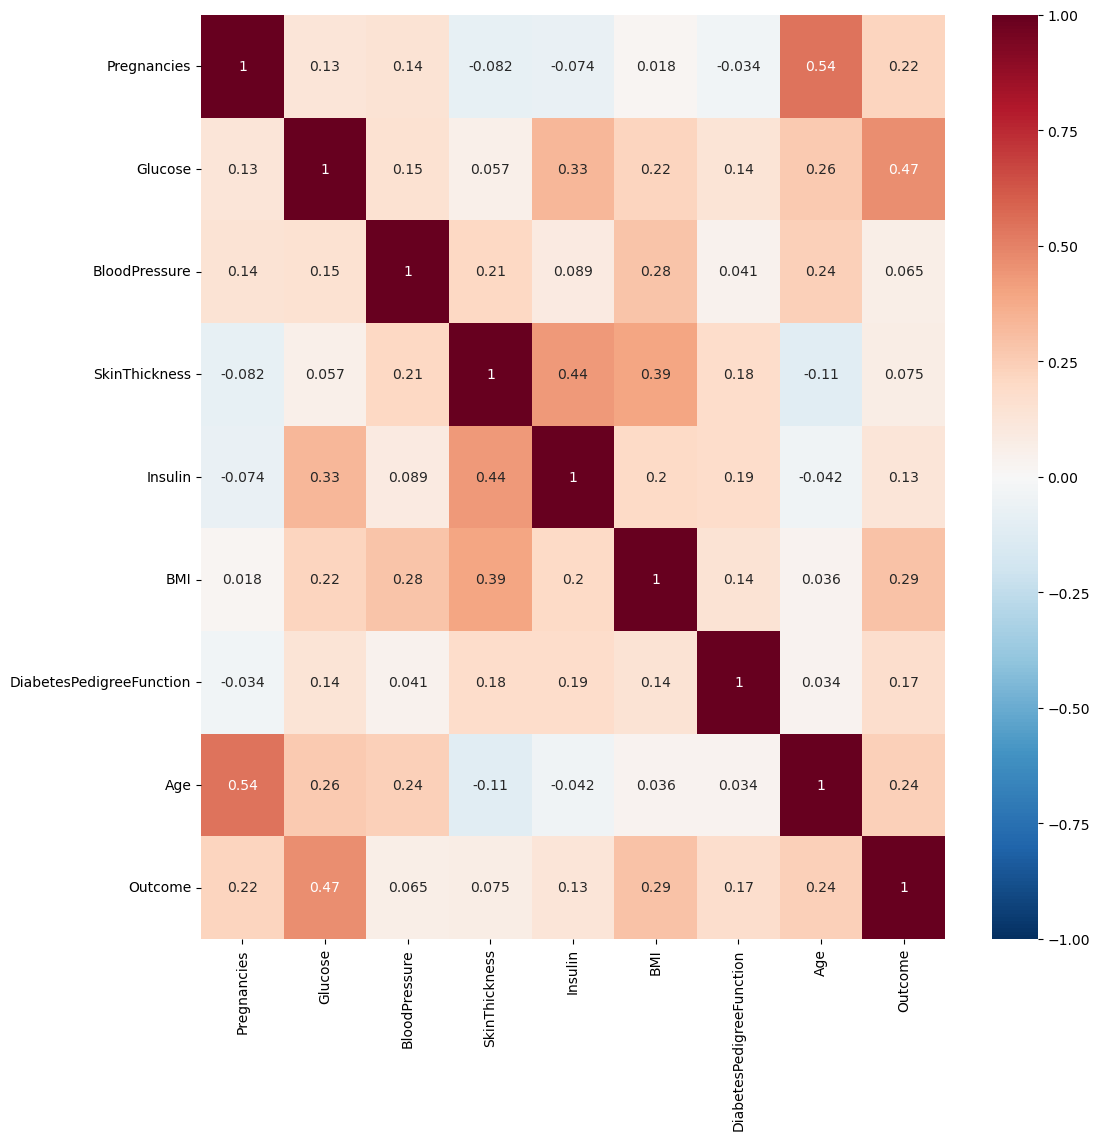

In [48]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), vmin = -1.0, center = 0, cmap = 'RdBu_r', annot = True)

## Replace Zeroes with NaNs

In [49]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[
    ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

## Split Data to Train Validation and Test

In [50]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_all, X_test, y_all, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_valid = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42)

In [51]:
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score


class Perceptron(BaseEstimator):
    def __init__(self, learning_rate=0.1, epochs=100, activation='step'):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation = activation
        self.w = None
        self.b = None
        self.activation_function = None
        self.activation_derivative = None
        
    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def tanh(self, z):
        func = np.tanh(z)
        return (func + 1) / 2  # Adjust tanh to range between 0 and 1
    
    def sigmoid_derivative(self,z):
        y_pred = self.sigmoid(z)
        return y_pred * (1 - y_pred)
    
    def tanh_derivative(self,z):
        # Adjust tanh derivative to range between 0 and 1
        return 0.5 * (1 - np.tanh(z) ** 2)

    def fit(self, X, y):
        if self.activation == 'step':
            self.activation_function = self.step
            self.activation_derivative = None
        elif self.activation == 'sigmoid':
            self.activation_function = self.sigmoid
            self.activation_derivative = self.sigmoid_derivative
        else:
            self.activation_function = self.tanh
            self.activation_derivative = self.tanh_derivative
        self.input_size = X.shape[1]
        self.w = np.zeros(self.input_size)
        self.b = 0
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                z = np.dot(self.w, xi) + self.b
                y_pred = self.activation_function(z)
                error = target - y_pred
                if self.activation_derivative:
                    derivative = self.activation_derivative(z)
                    self.w += self.learning_rate * error * derivative * xi
                    self.b += self.learning_rate * error * derivative
                else:
                    self.w += self.learning_rate * error * xi
                    self.b += self.learning_rate * error
        return self

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        y_pred = self.activation_function(z)
        return np.where(y_pred >= 0.5, 1, 0)

In [52]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, KFold

In [53]:
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler()),
    ('perceptron', Perceptron(learning_rate=0.1, epochs=100,
     activation='tanh'))
])

In [54]:
param_grid = {
    'perceptron__learning_rate': [0.01, 0.05, 0.1, 0.5],
    'perceptron__epochs': [100, 500, 1000],
    'perceptron__activation': ['step','sigmoid','tanh']
}

In [55]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [56]:
grid_search = GridSearchCV(pipeline, param_grid, cv=kf,
                           n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'perceptron__activation': 'sigmoid', 'perceptron__epochs': 100, 'perceptron__learning_rate': 0.5}


In [57]:
y_val_pred = grid_search.best_estimator_.predict(X_val)
val_accuracy = accuracy_score(y_valid, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.7560975609756098


In [58]:
best_model = grid_search.best_estimator_
best_model.fit(X_all, y_all)

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', RobustScaler()),
                ('perceptron',
                 Perceptron(activation='sigmoid', learning_rate=0.5))])

In [59]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7727272727272727


Confusion Matrix:
[[81 18]
 [17 38]]


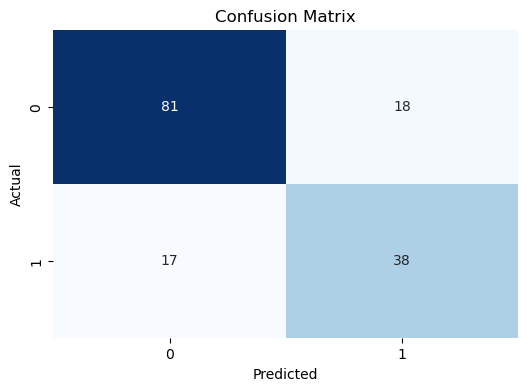

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [60]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

In [61]:
param_grid_each = {
    'perceptron__learning_rate': [0.01, 0.05, 0.1, 0.5],
    'perceptron__epochs': [100, 500, 1000]
}

In [62]:
def get_best_model(activation):
    grid_search = GridSearchCV(
        pipeline, param_grid_each, cv=kf, n_jobs=-1, verbose=1, scoring='accuracy')
    pipeline.set_params(perceptron__activation=activation)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

In [63]:
activations = ['step', 'sigmoid', 'tanh']
results = {}
confusion_matrices = {}
classification_reports = {}

In [64]:
for activation in activations:
    best_model, best_params = get_best_model(activation)

    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_valid, y_val_pred)

    best_model.fit(X_all, y_all)

    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    confusion_matrices[activation] = conf_matrix_test

    class_report = classification_report(y_test, y_test_pred, output_dict=True)
    classification_reports[activation] = class_report

    results[activation] = {
        'best_params': best_params,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy
    }

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits



Activation: step
Best parameters: {'perceptron__epochs': 1000, 'perceptron__learning_rate': 0.01}
Validation accuracy: 0.6585
Test accuracy: 0.6883

Classification Report for activation 'step':
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Activation: sigmoid
Best parameters: {'perceptron__epochs': 100, 'perceptron__learning_rate': 0.5}
Validation accuracy: 0.7561
Test accuracy: 0.7727

Classification Report for activation 'sigmoid':
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighte

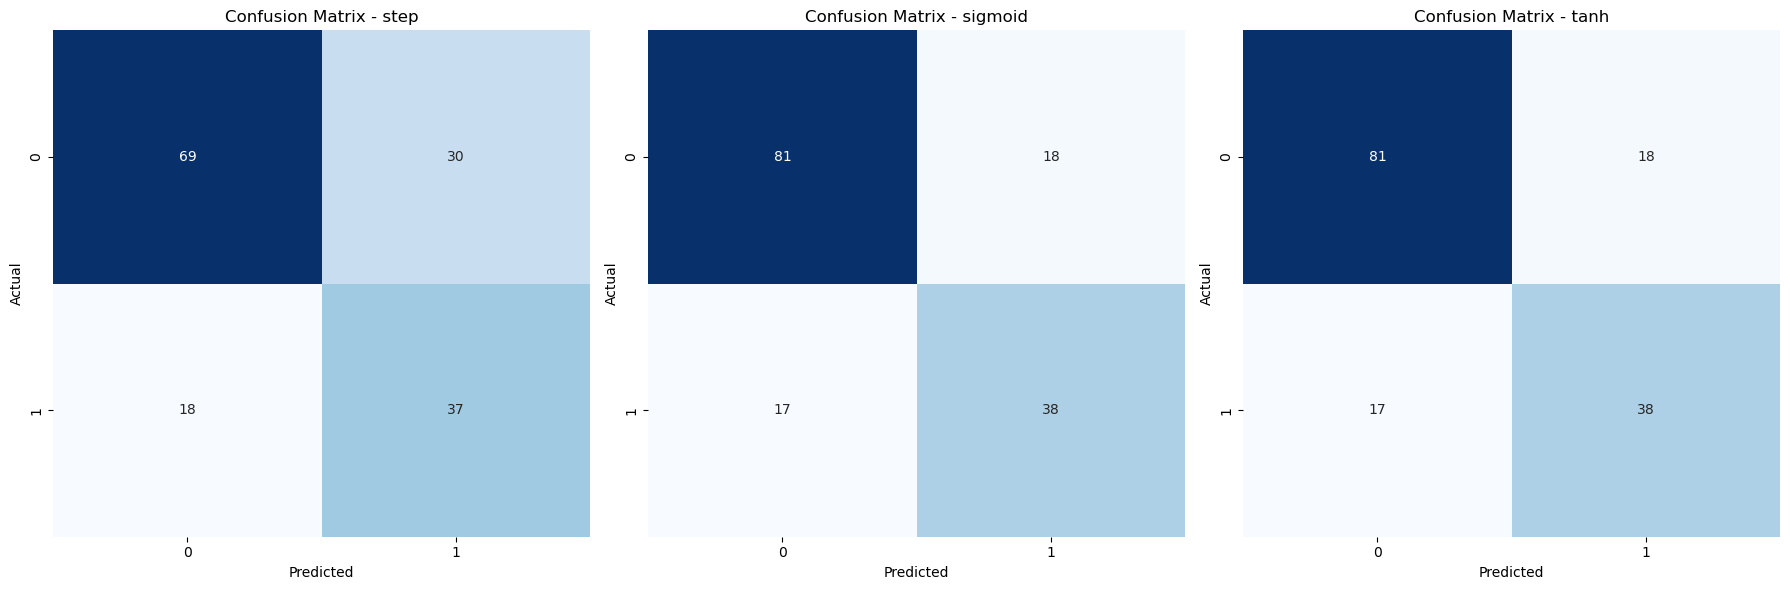

In [65]:
for activation, result in results.items():
    print(f"\nActivation: {activation}")
    print(f"Best parameters: {result['best_params']}")
    print(f"Validation accuracy: {result['val_accuracy']:.4f}")
    print(f"Test accuracy: {result['test_accuracy']:.4f}")
    print(f"\nClassification Report for activation '{activation}':")
    print(classification_report(y_test, best_model.predict(X_test)))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, activation in enumerate(activations):
    sns.heatmap(confusion_matrices[activation], annot=True,
                fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {activation}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()